In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import requests
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow
import datetime
from datetime import date
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/data_daily.csv')
raw_data.head(10)

,Date,Open,High,Low,Close
0,2023-05-19,1.08528,1.09046,1.07590,1.08019
1,2023-05-12,1.10209,1.10537,1.08468,1.08470
2,2023-05-05,1.10178,1.10917,1.09410,1.10174
3,2023-04-28,1.09861,1.10954,1.09610,1.10140
4,2023-04-21,1.09926,1.09998,1.09080,1.09880
5,2023-04-14,1.08995,1.10759,1.08300,1.09910
6,2023-04-07,1.08418,1.09733,1.07870,1.09014
7,2023-03-31,1.07645,1.09263,1.07430,1.08381
8,2023-03-24,1.06832,1.09300,1.06290,1.07588
9,2023-03-17,1.06938,1.07600,1.05150,1.06639


In [ ]:
raw_data = raw_data.applymap(lambda x: pd.to_numeric(x, errors='ignore'))

In [ ]:
raw_data

,Date,Open,High,Low,Close
0,2023-05-19,1.08528,1.09046,1.07590,1.08019
1,2023-05-12,1.10209,1.10537,1.08468,1.08470
2,2023-05-05,1.10178,1.10917,1.09410,1.10174
3,2023-04-28,1.09861,1.10954,1.09610,1.10140
4,2023-04-21,1.09926,1.09998,1.09080,1.09880
...,...,...,...,...,...
994,2004-04-30,1.17970,1.20090,1.17560,1.19790
995,2004-04-23,1.20150,1.20770,1.17760,1.18410
996,2004-04-16,1.20860,1.20970,1.18640,1.19930
997,2004-04-09,1.21210,1.22210,1.19790,1.20940


In [ ]:
raw_data = raw_data.dropna()
raw_data

,Date,Open,High,Low,Close
0,2023-05-19,1.08528,1.09046,1.07590,1.08019
1,2023-05-12,1.10209,1.10537,1.08468,1.08470
2,2023-05-05,1.10178,1.10917,1.09410,1.10174
3,2023-04-28,1.09861,1.10954,1.09610,1.10140
4,2023-04-21,1.09926,1.09998,1.09080,1.09880
...,...,...,...,...,...
994,2004-04-30,1.17970,1.20090,1.17560,1.19790
995,2004-04-23,1.20150,1.20770,1.17760,1.18410
996,2004-04-16,1.20860,1.20970,1.18640,1.19930
997,2004-04-09,1.21210,1.22210,1.19790,1.20940


In [ ]:
raw_data = raw_data.drop_duplicates()

In [ ]:
raw_data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:

raw_data['Date'] = pd.to_datetime(raw_data['Date'])

In [ ]:
type(raw_data)

pandas.core.frame.DataFrame

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    999 non-null    datetime64[ns]
 1   Open    999 non-null    float64       
 2   High    999 non-null    float64       
 3   Low     999 non-null    float64       
 4   Close   999 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 46.8 KB


In [ ]:
data = raw_data
data.sort_values(by='Date', ascending=True, inplace=True)
data.head()


,Date,Open,High,Low,Close
998,2004-04-02,1.2144,1.2388,1.2043,1.2130
997,2004-04-09,1.2121,1.2221,1.1979,1.2094
996,2004-04-16,1.2086,1.2097,1.1864,1.1993
995,2004-04-23,1.2015,1.2077,1.1776,1.1841
994,2004-04-30,1.1797,1.2009,1.1756,1.1979


In [ ]:
import pandas as pd 

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
data_open = series_to_supervised(data[['Open']], n_in=55, n_out=1, dropnan=True)

data_open

,var1(t-55),var1(t-54),var1(t-53),var1(t-52),var1(t-51),var1(t-50),var1(t-49),var1(t-48),var1(t-47),var1(t-46),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
943,1.21440,1.21210,1.20860,1.20150,1.17970,1.19760,1.18680,1.18860,1.19790,1.22470,...,1.29610,1.30590,1.32420,1.32300,1.34640,1.33090,1.29500,1.28810,1.29280,1.29150
942,1.21210,1.20860,1.20150,1.17970,1.19760,1.18680,1.18860,1.19790,1.22470,1.22830,...,1.30590,1.32420,1.32300,1.34640,1.33090,1.29500,1.28810,1.29280,1.29150,1.30640
941,1.20860,1.20150,1.17970,1.19760,1.18680,1.18860,1.19790,1.22470,1.22830,1.20030,...,1.32420,1.32300,1.34640,1.33090,1.29500,1.28810,1.29280,1.29150,1.30640,1.28590
940,1.20150,1.17970,1.19760,1.18680,1.18860,1.19790,1.22470,1.22830,1.20030,1.21370,...,1.32300,1.34640,1.33090,1.29500,1.28810,1.29280,1.29150,1.30640,1.28590,1.28150
939,1.17970,1.19760,1.18680,1.18860,1.19790,1.22470,1.22830,1.20030,1.21370,1.21370,...,1.34640,1.33090,1.29500,1.28810,1.29280,1.29150,1.30640,1.28590,1.28150,1.26120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.09836,1.10380,1.09083,1.08069,1.08058,1.05464,1.05404,1.03968,1.05583,1.07326,...,1.06807,1.06868,1.05451,1.06237,1.06938,1.06832,1.07645,1.08418,1.08995,1.09926
3,1.10380,1.09083,1.08069,1.08058,1.05464,1.05404,1.03968,1.05583,1.07326,1.07188,...,1.06868,1.05451,1.06237,1.06938,1.06832,1.07645,1.08418,1.08995,1.09926,1.09861
2,1.09083,1.08069,1.08058,1.05464,1.05404,1.03968,1.05583,1.07326,1.07188,1.05142,...,1.05451,1.06237,1.06938,1.06832,1.07645,1.08418,1.08995,1.09926,1.09861,1.10178
1,1.08069,1.08058,1.05464,1.05404,1.03968,1.05583,1.07326,1.07188,1.05142,1.04870,...,1.06237,1.06938,1.06832,1.07645,1.08418,1.08995,1.09926,1.09861,1.10178,1.10209


In [ ]:
data_close = series_to_supervised(data[['Close']], n_in=55, n_out=1, dropnan=True)

data_close

,var1(t-55),var1(t-54),var1(t-53),var1(t-52),var1(t-51),var1(t-50),var1(t-49),var1(t-48),var1(t-47),var1(t-46),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
943,1.2130,1.2094,1.1993,1.1841,1.19790,1.18860,1.18800,1.20220,1.22090,1.2289,...,1.30650,1.32440,1.32360,1.34530,1.33230,1.29550,1.29060,1.29200,1.28980,1.30640
942,1.2094,1.1993,1.1841,1.1979,1.18860,1.18800,1.20220,1.22090,1.22890,1.2007,...,1.32440,1.32360,1.34530,1.33230,1.29550,1.29060,1.29200,1.28980,1.30640,1.28690
941,1.1993,1.1841,1.1979,1.1886,1.18800,1.20220,1.22090,1.22890,1.20070,1.2137,...,1.32360,1.34530,1.33230,1.29550,1.29060,1.29200,1.28980,1.30640,1.28690,1.28340
940,1.1841,1.1979,1.1886,1.1880,1.20220,1.22090,1.22890,1.20070,1.21370,1.2150,...,1.34530,1.33230,1.29550,1.29060,1.29200,1.28980,1.30640,1.28690,1.28340,1.26190
939,1.1979,1.1886,1.1880,1.2022,1.22090,1.22890,1.20070,1.21370,1.21500,1.2321,...,1.33230,1.29550,1.29060,1.29200,1.28980,1.30640,1.28690,1.28340,1.26190,1.25500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.1047,1.0875,1.0805,1.0794,1.05410,1.05510,1.04120,1.05600,1.07317,1.0719,...,1.06929,1.05437,1.06337,1.06387,1.06639,1.07588,1.08381,1.09014,1.09910,1.09880
3,1.0875,1.0805,1.0794,1.0541,1.05510,1.04120,1.05600,1.07317,1.07190,1.0515,...,1.05437,1.06337,1.06387,1.06639,1.07588,1.08381,1.09014,1.09910,1.09880,1.10140
2,1.0805,1.0794,1.0541,1.0551,1.04120,1.05600,1.07317,1.07190,1.05150,1.0498,...,1.06337,1.06387,1.06639,1.07588,1.08381,1.09014,1.09910,1.09880,1.10140,1.10174
1,1.0794,1.0541,1.0551,1.0412,1.05600,1.07317,1.07190,1.05150,1.04980,1.0554,...,1.06387,1.06639,1.07588,1.08381,1.09014,1.09910,1.09880,1.10140,1.10174,1.08470


In [ ]:
data_NN = []
data_NN.append(data_open)
data_NN.append(data_close)

In [ ]:
data_NN = np.asarray(data_NN).transpose(1, 2, 0)

data_NN.shape

(944, 56, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(data_NN)[:, :-1, :], np.array(data_NN)[:, -1, :], shuffle=False, test_size=0.2)

In [ ]:
X_train.shape

(755, 55, 2)

In [ ]:
y_train.shape

(755, 2)

In [ ]:
X_test.shape

(189, 55, 2)

In [ ]:
y_test.shape

(189, 2)

In [ ]:
y_train[0]

array([1.2915, 1.3064])

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf

In [ ]:
def get_model(hp):
  X1 = hp.Int("units1_op", min_value = 32, max_value = 512, step = 32)
  X2 = hp.Int("units1_cl", min_value = 32, max_value = 512, step = 32)

  input = tf.keras.layers.Input(shape = (55, 2))

  open = tf.keras.layers.LSTM(units=X1, return_sequences=True, activation='tanh')(input)
  open = tf.keras.layers.BatchNormalization()(open)
  open = tf.keras.layers.Dropout(0.5)(open)
  open = tf.keras.layers.Flatten()(open)

  close = tf.keras.layers.LSTM(units=X2, return_sequences=True, activation='tanh')(input)
  close = tf.keras.layers.BatchNormalization()(close)
  close = tf.keras.layers.Dropout(0.5)(close)
  close = tf.keras.layers.Flatten()(close)

  open = tf.keras.layers.Dense(1)(open)
  close = tf.keras.layers.Dense(1)(close)

  model = tf.keras.Model(inputs=input, outputs=[open, close])
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon=1e-7)
  model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

  return model

In [ ]:
tuner = kt.Hyperband(hypermodel = get_model, objective = 'val_loss', directory = '/content', project_name = 'final')

stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
from keras import callbacks
tuner.search(X_train, y_train, validation_data=(X_test, y_test), callbacks=[stop_early])

Trial 254 Complete [00h 00m 39s]
val_loss: 0.0009988980600610375

Best val_loss So Far: 0.0005213012918829918
Total elapsed time: 00h 51m 41s


In [ ]:
prm = tuner.get_best_hyperparameters()[0]

print("units1_op: ", prm.get('units1_op'))

print(' ')
print("units1_cl: ", prm.get('units1_cl'))

units1_op:  352
 
units1_cl:  480


In [ ]:
model = tuner.get_best_models()[0]
model.build(X_train.shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 55, 2)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 55, 352)      499840      ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 55, 480)      927360      ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 352)     1408        ['lstm[0][0]']                   
 alization)                                                                                   

In [ ]:
best_model = tf.keras.callbacks.ModelCheckpoint('RNN.h5', monitor='val_loss', verbose=2, save_best_only=True, mode='auto')
model.fit(X_train, [y_train[:,0], y_train[:,1]], validation_data=(X_test, [y_test[:,0], y_test[:,1]]), epochs=1000, callbacks=[best_model])

Setting learning rate to 1e-06
Epoch 1/1000
23/24 [===========================>..] - ETA: 0s - loss: 5.3242e-04 - dense_loss: 1.5562e-04 - dense_1_loss: 3.7680e-04 - dense_mse: 1.5562e-04 - dense_1_mse: 3.7680e-04
Epoch 1: val_loss improved from inf to 0.00020, saving model to RNN.h5
24/24 [==============================] - 6s 73ms/step - loss: 5.2695e-04 - dense_loss: 1.5403e-04 - dense_1_loss: 3.7292e-04 - dense_mse: 1.5403e-04 - dense_1_mse: 3.7292e-04 - val_loss: 2.0328e-04 - val_dense_loss: 1.2172e-05 - val_dense_1_loss: 1.9111e-04 - val_dense_mse: 1.2172e-05 - val_dense_1_mse: 1.9111e-04
Setting learning rate to 1e-06
Epoch 2/1000
24/24 [==============================] - ETA: 0s - loss: 5.2037e-04 - dense_loss: 1.5056e-04 - dense_1_loss: 3.6981e-04 - dense_mse: 1.5056e-04 - dense_1_mse: 3.6981e-04
Epoch 2: val_loss improved from 0.00020 to 0.00019, saving model to RNN.h5
24/24 [==============================] - 1s 25ms/step - loss: 5.2037e-04 - dense_loss: 1.5056e-04 - dense_1_lo

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/RNN.h5')

In [ ]:
y_pred_train = model.predict(X_train)

24/24 [==============================] - 1s 9ms/step


In [ ]:
y_pred_test = model.predict(X_test)

6/6 [==============================] - 0s 6ms/step


In [ ]:
y_pred_train[0].shape

(755, 1)

In [ ]:
def reset_data(data, data_NN, y_train, y_test):
  open_pred = np.vstack((y_train[0], y_test[0]))
  close_pred = np.vstack((y_train[1], y_test[1]))
  n_missing = data.shape[0] - data_NN.shape[0]
  none = []
  for i in range(n_missing):
    none.append(None)
  none = np.array(none).reshape(-1, 1)
  open_pred = np.vstack((none, open_pred))
  close_pred = np.vstack((none, close_pred))
  data['Open_pred'] = open_pred
  data['Close_pred'] = close_pred


In [ ]:
reset_data(data, data_NN, y_pred_train, y_pred_test)

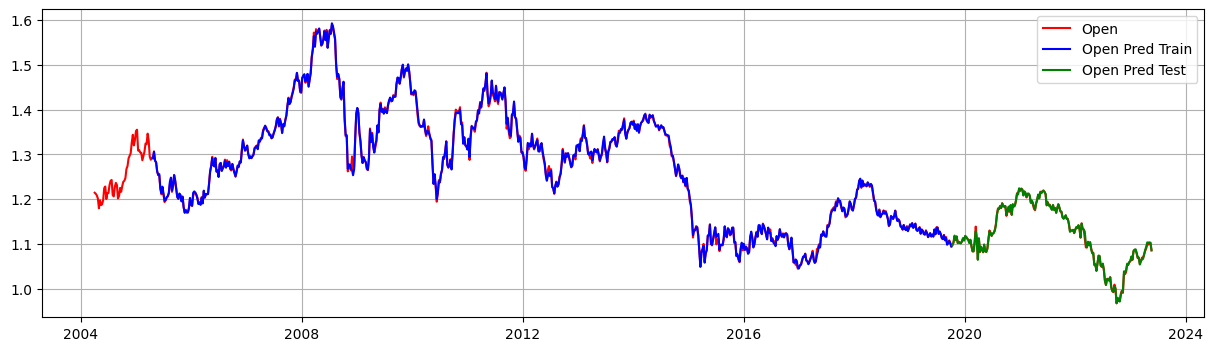

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'], data['Open'], label='Open', c='r')
plt.plot(data['Date'].iloc[:-y_pred_test[0].shape[0]], data['Open_pred'].iloc[:-y_pred_test[0].shape[0]], label='Open Pred Train', c='blue')
plt.plot(data['Date'].iloc[-y_pred_test[0].shape[0]:], data['Open_pred'].iloc[-y_pred_test[0].shape[0]:], label='Open Pred Test', c='g')
plt.legend()
plt.grid()

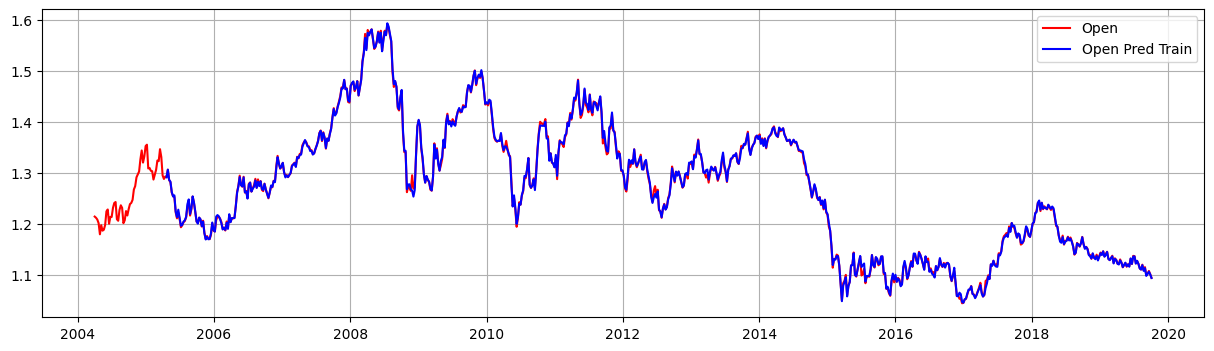

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Open'].iloc[:-y_test.shape[0]], label='Open',c='r')
plt.plot(data['Date'].iloc[:-y_pred_test[0].shape[0]], data['Open_pred'].iloc[:-y_pred_test[0].shape[0]], label='Open Pred Train', c='blue')
plt.legend()
plt.grid()

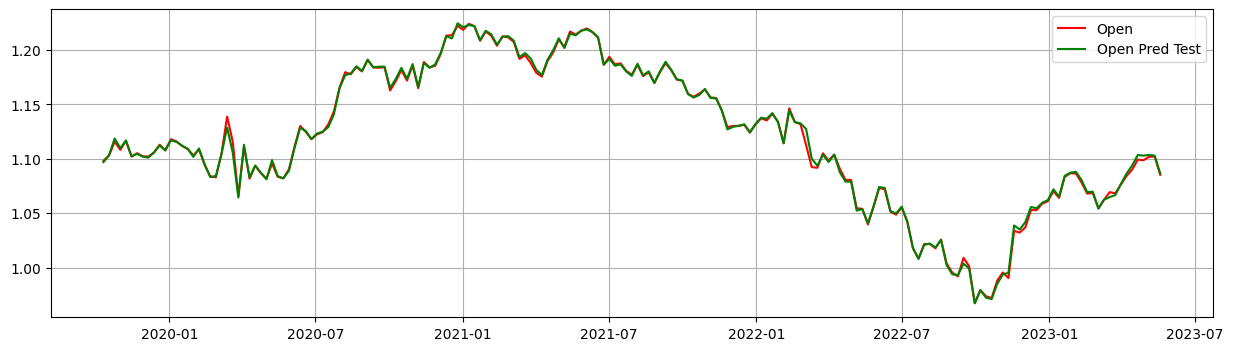

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Open'].iloc[-y_test.shape[0]:], label='Open', c='r')
plt.plot(data['Date'].iloc[-y_pred_test[0].shape[0]:], data['Open_pred'].iloc[-y_pred_test[0].shape[0]:], label='Open Pred Test', c='g')
plt.legend()
plt.grid()

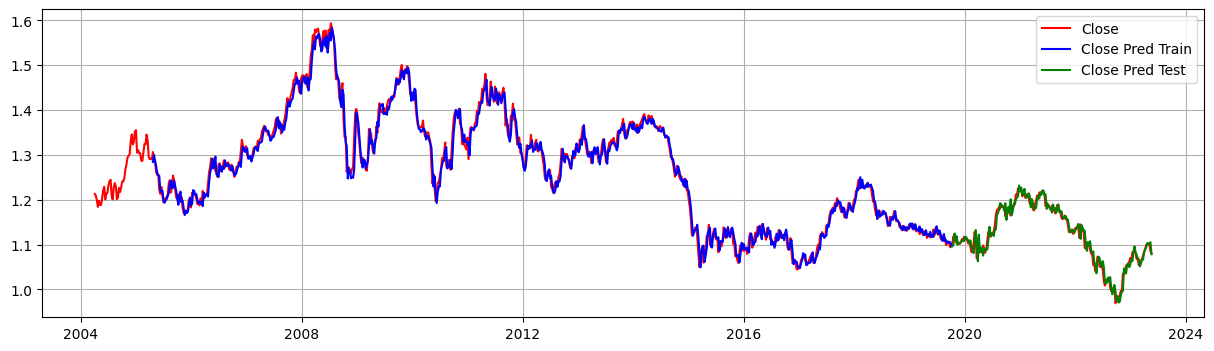

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'], data['Close'], label='Close', c='r')
plt.plot(data['Date'].iloc[:-y_pred_test[1].shape[0]], data['Close_pred'].iloc[:-y_pred_test[0].shape[0]], label='Close Pred Train', c='blue')
plt.plot(data['Date'].iloc[-y_pred_test[1].shape[0]:], data['Close_pred'].iloc[-y_pred_test[0].shape[0]:], label='Close Pred Test', c='g')

plt.legend()
plt.grid()

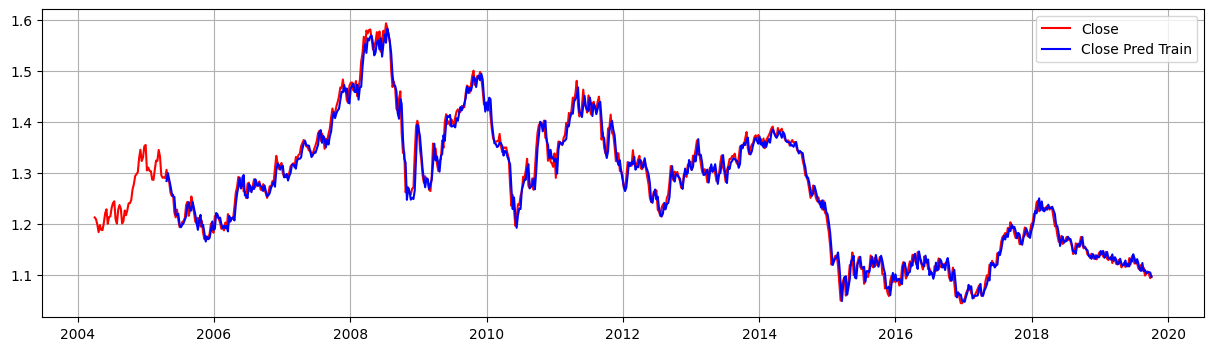

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Close'].iloc[:-y_test.shape[0]], label='Close', c='r')
plt.plot(data['Date'].iloc[:-y_pred_test[1].shape[0]], data['Close_pred'].iloc[:-y_pred_test[0].shape[0]], label='Close Pred Train', c='blue')
plt.legend()
plt.grid()

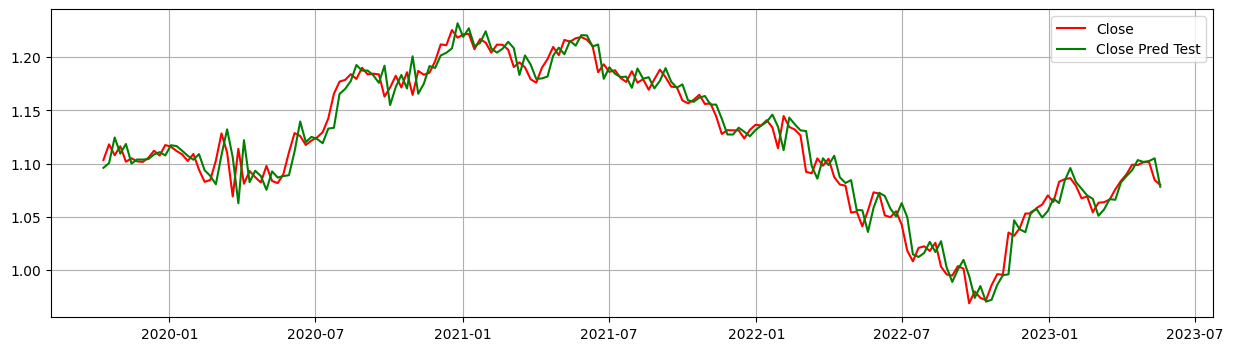

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close'].iloc[-y_test.shape[0]:], label='Close', c='r')
plt.plot(data['Date'].iloc[-y_pred_test[1].shape[0]:], data['Close_pred'].iloc[-y_pred_test[0].shape[0]:], label='Close Pred Test', c='g')
plt.legend()
plt.grid()

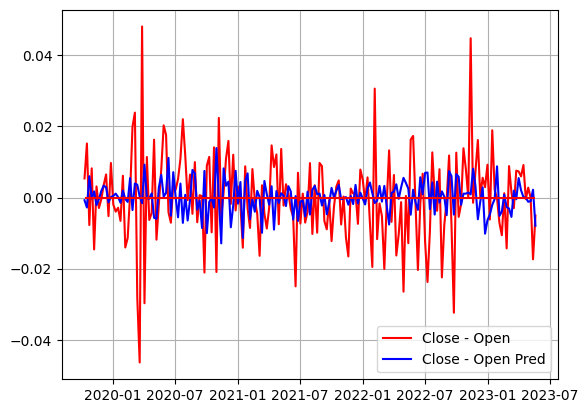

In [ ]:
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close'].iloc[-y_test.shape[0]:] - data['Open'].iloc[-y_test.shape[0]:], label='Close - Open', c='r')
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close_pred'].iloc[-y_test.shape[0]:] - data['Open_pred'].iloc[-y_test.shape[0]:], label='Close - Open Pred', c='blue')

plt.hlines(0, xmin=min(data['Date'].iloc[-y_test.shape[0]:]), xmax=max(data['Date'].iloc[-y_test.shape[0]:]), color='red', linestyle='-')
plt.legend()
plt.grid()

In [ ]:
def visual(input, predict):
  plt.plot(input['Date'].iloc[-4:], input['Open'].iloc[-4:], label='Open', c='green')
  plt.scatter(input['Date'].iloc[-4:], input['Open'].iloc[-4:], c='green')
  plt.plot(input['Date'].iloc[-4:], input['Close'].iloc[-4:], label='Close', c='red')
  plt.scatter(input['Date'].iloc[-4:], input['Close'].iloc[-4:], c='red')
  plt.scatter(predict['Date'], predict['Open'], alpha=0.75 ,label='Open Predict', c='green')
  plt.scatter(predict['Date'], predict['Close'], alpha=0.75, label='Close Predict', c='red')

  plt.xticks(rotation=45)
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
def predict(input,  model):
  open_data = input[['Date', 'Open']]
  close_data = input[['Date', 'Close']]

  data_NN = np.hstack((np.array(open_data['Open']).reshape(-1, 1), np.array(close_data['Close']).reshape(-1, 1)))
  print(data_NN.shape)

  predict = model.predict(data_NN[None, ...])
  predict = pd.Series({'Date': input.iloc[-1, 0] + pd.Timedelta(days=7), 'Open': predict[0], 'Close': predict[1]})

  visual(input, predict)

  return predict

In [ ]:
t = raw_data[['Date', 'Open', 'Close']].sort_values(by='Date', ascending=True).iloc[-55:]

(55, 2)
1/1 [==============================] - 0s 30ms/step


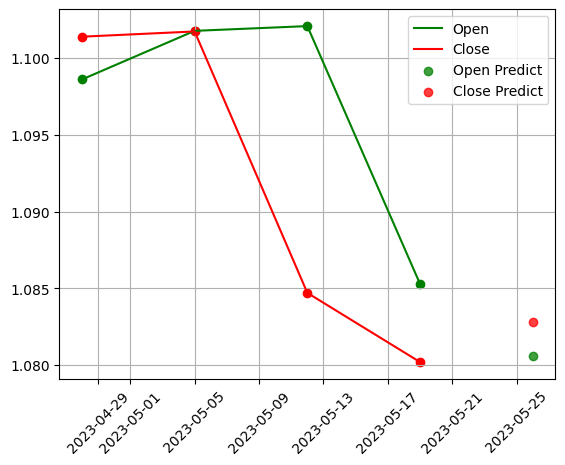

In [ ]:
y_pred = predict(t, model)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r = np.cov(y_true, y_pred)[0, 1] / (np.std(y_true) * np.std(y_pred))
    nse = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    
    return rmse, mae, r, nse

In [ ]:
print("open")
rmse, mae, r, nse = evaluate(y_test[:, 0], np.concatenate(y_pred_test[0]))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R: {r}")
print(f"NSE: {nse}")

open
RMSE: 0.002255032724973566
MAE: 0.0014038952973784544
R: 1.00470458958253
NSE: 0.9987532459273574


In [ ]:
print("close")

rmse, mae, r, nse = evaluate(y_test[:, 1], np.concatenate(y_pred_test[1]))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R: {r}")
print(f"NSE: {nse}")

close
RMSE: 0.013477002294628311
MAE: 0.010024247951507565
R: 0.9828818555497802
NSE: 0.955396407260834


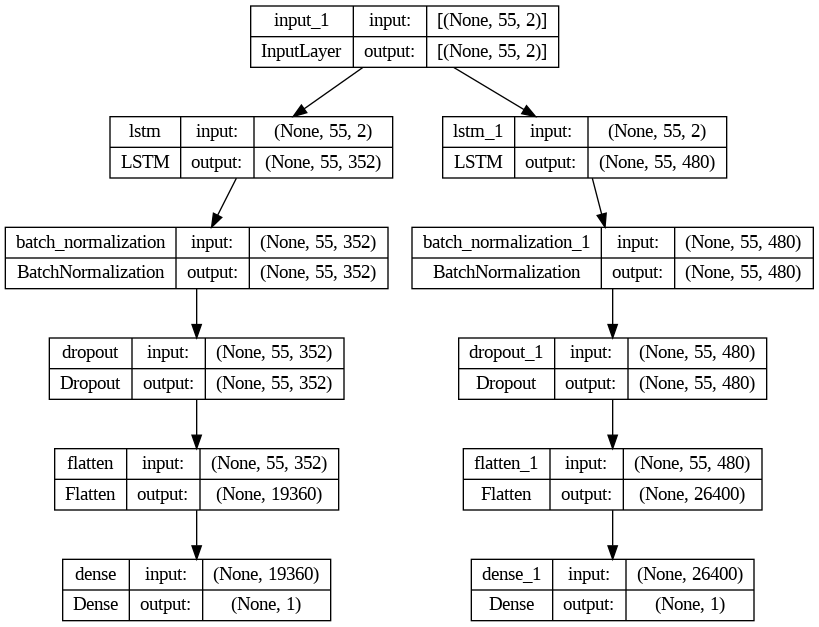

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)